# Acquire (acquire.py)

Zillow

For the following, iterate through the steps you would take to create functions: write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline

***acquire & summarize***

1. Acquire data from mySQL using the python module to connect and query. you will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database

    - ***Be sure to do the correct join. We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`***
    
    - only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property id's), along with zestimate error and date of transaction.
    
    - only include properties that include a latitude and longitude value.

In [1]:
# Set up

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd 
import numpy as np 

# Exploring
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# default pandas decimal number display format.
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option("max_r", 80)

import acquire
import prepare


In [2]:
df = acquire.get_data_from_mysql()

In [3]:
df

,logerror,transactiondate,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.03,2017-01-01,1727539,14297519,nan,nan,nan,3.50,4.00,nan,...,nan,nan,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72",None,nan,"60,590,630,072,012.00"
1,0.06,2017-01-01,1387261,17052889,nan,nan,nan,1.00,2.00,nan,...,1.00,nan,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48",None,nan,"61,110,010,023,006.00"
2,0.01,2017-01-01,11677,14186244,nan,nan,nan,2.00,3.00,nan,...,1.00,nan,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30",None,nan,"60,590,218,022,012.00"
3,-0.10,2017-01-01,2288172,12177905,nan,nan,nan,3.00,4.00,nan,...,nan,nan,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51",None,nan,"60,373,001,001,006.00"
4,0.01,2017-01-01,1970746,10887214,1.00,nan,nan,3.00,3.00,nan,...,nan,nan,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89",None,nan,"60,371,236,012,000.00"
5,-0.02,2017-01-01,1447245,17143294,nan,nan,nan,2.00,3.00,nan,...,2.00,nan,"198,640.00","331,064.00","2,016.00","132,424.00","3,508.10",None,nan,"61,110,053,062,009.00"
6,-0.00,2017-01-01,781532,12095076,1.00,nan,nan,3.00,4.00,nan,...,nan,nan,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26",None,nan,"60,374,608,001,014.00"
7,0.10,2017-01-01,870991,12069064,nan,nan,nan,1.00,2.00,nan,...,nan,nan,"18,890.00","218,552.00","2,016.00","199,662.00","2,366.08",None,nan,"60,373,020,041,001.00"
8,-0.04,2017-01-02,1246926,12790562,nan,nan,nan,3.00,4.00,nan,...,nan,nan,"177,527.00","220,583.00","2,016.00","43,056.00","3,104.19",None,nan,"60,375,002,024,006.00"
9,-0.04,2017-01-02,1585097,11542646,nan,nan,nan,3.00,2.00,nan,...,nan,nan,"151,303.00","371,361.00","2,016.00","220,058.00","4,557.32",None,nan,"60,372,751,022,006.00"


1. Summarizes the data you have just read into a dataframe in the ways we have discussed in previous models (sample view, datatypes, value counts, summary stats, ...)


In [24]:
df.shape

(77380, 61)

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 61 columns):
logerror                        77380 non-null float64
transactiondate                 77380 non-null object
id                              77380 non-null int64
parcelid                        77380 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77380 non-null float64
bedroomcnt                      77380 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49671 non-null float64
calculatedbathnbr               76771 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77184 non-null float64
finishedsquarefeet12            73748 non-null float64
finishedsquarefeet13       

In [124]:
pd.get_option("display.max_rows")

80

In [167]:
pd.set_option("max_r", 100)
pd.set_option('display.max_columns', None)


In [168]:
pd.get_option("display.max_rows")

100

### nulls_by_col

In [169]:
def nulls_by_col(df):
    # Look at the number missing.
    num_missing = df.isnull().sum()
        # num_missing.head(20)

    # number of rows
    rows = df.shape[0]
        #rows

    # percent missing
    pct_missing = num_missing/rows
        # pct_missing.head(20)

    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
        #cols_missing.head(20)
    
    return cols_missing

In [170]:
nulls_by_col(df)

,num_rows_missing,pct_rows_missing
logerror,0,0.00
transactiondate,0,0.00
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52427,0.68
architecturalstyletypeid,77174,1.00
basementsqft,77330,1.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,77365,1.00


### nulls_by_row

In [220]:
def nulls_by_row(df):
    # Look as nulls by rows (axis = 1)
    num_cols_missing = df.isnull().sum(axis=1)
        # num_cols_missing
    
    # number of colums
    columns = df.shape[1]
    
    # Pecents of colums missing 
    pct_cols_missing = num_cols_missing/columns * 100
        #pct_cols_missing
        #pct_cols_missing.value_counts().sort_index()
    
    # Amount of rows with missing columns and percentage
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing', 'pct_cols_missing']).count().rename(index = str, columns={'index':'num_rows'}).reset_index()

    return rows_missing

In [221]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,19,31.147540983606557,2
1,20,32.78688524590164,10
2,21,34.42622950819672,83
3,22,36.0655737704918,262
4,23,37.704918032786885,599
5,24,39.34426229508197,660
6,25,40.98360655737705,5768
7,26,42.62295081967213,7996
8,27,44.26229508196721,12410
9,28,45.90163934426229,20660


In [204]:
def df_value_counts(df):
    for col in df.columns:
        print(f'{col}:')
        if df[col].dtype == 'object':
            col_count = df[col].value_counts()
        else:
            if df[col].nunique() >= 35:
                col_count = df[col].value_counts(bins=10, sort=False)
            else:
                col_count = df[col].value_counts()
        print(col_count)
        print('\n')


In [205]:
df_value_counts(df)

logerror:
(-4.666, -3.664]        3
(-3.664, -2.672]        1
(-2.672, -1.68]        36
(-1.68, -0.688]       142
(-0.688, 0.304]     75339
(0.304, 1.296]       1684
(1.296, 2.287]        102
(2.287, 3.279]         71
(3.279, 4.271]          1
(4.271, 5.263]          1
Name: logerror, dtype: int64


transactiondate:
2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
2017-03-31     770
2017-05-26     743
2017-06-16     727
2017-06-23     706
2017-08-25     696
2017-07-07     685
2017-09-01     669
2017-08-11     619
2017-07-14     618
2017-05-05     616
2017-09-08     615
2017-06-01     614
2017-03-24     609
2017-07-31     601
2017-05-12     598
2017-05-19     594
2017-06-29     585
2017-08-18     584
2017-06-09     577
2017-07-21     573
2017-04-14     571
2017-03-28     571
2017-02-28     569
2017-06-02     567
2017-04-21     556
2017-08-30     549
2017-04-07     544
2017-05-25     536
2017-03-17     536
2017-03-30     518
2017-06-27     51

(-119477336.781, -119283338.0]      221
(-119283338.0, -119091260.0]       1997
(-119091260.0, -118899182.0]       1494
(-118899182.0, -118707104.0]       2660
(-118707104.0, -118515026.0]       5926
(-118515026.0, -118322948.0]      15424
(-118322948.0, -118130870.0]      15361
(-118130870.0, -117938792.0]      14219
(-117938792.0, -117746714.0]      12688
(-117746714.0, -117554636.0]       7390
Name: longitude, dtype: int64


lotsizesquarefeet:
(-6734.775000000001, 697313.4]    68855
(697313.4, 1394390.8]               227
(1394390.8, 2091468.2]               40
(2091468.2, 2788545.6]                2
(2788545.6, 3485623.0]                1
(3485623.0, 4182700.4]                9
(4182700.4, 4879777.8]                0
(4879777.8, 5576855.2]                0
(5576855.2, 6273932.6]                0
(6273932.6, 6971010.0]                7
Name: lotsizesquarefeet, dtype: int64


poolcnt:
1.00    16137
Name: poolcnt, dtype: int64


poolsizesum:
(22.523, 171.6]       7
(171.6, 319.2]     

(59948352007016.984, 102636920499301.5]    77135
(102636920499301.5, 144902829897603.0]         0
(144902829897603.0, 187168739295904.5]         0
(187168739295904.5, 229434648694206.03]        0
(229434648694206.03, 271700558092507.5]        0
(271700558092507.5, 313966467490809.0]         0
(313966467490809.0, 356232376889110.5]         0
(356232376889110.5, 398498286287411.94]        0
(398498286287411.94, 440764195685713.5]        0
(440764195685713.5, 483030105084015.0]         1
Name: censustractandblock, dtype: int64




In [206]:
def df_summary(df):
    print(f'--- Shape:{df.shape}')
    print('\n--- Info:')
    df.info()
    print('\n--- Descriptions:')
    print(df.describe(include='all'))
    print(f'\n--- Nulls by Column:\n {nulls_by_col(df)}')
    print(f'\n--- Nulls by Row:\n {nulls_by_row(df)}')
    print('\n--- Value Counts:\n')
    print(df_value_counts(df))

In [207]:
df_summary(df)

--- Shape:(77380, 61)

--- Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 61 columns):
logerror                        77380 non-null float64
transactiondate                 77380 non-null object
id                              77380 non-null int64
parcelid                        77380 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77380 non-null float64
bedroomcnt                      77380 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49671 non-null float64
calculatedbathnbr               76771 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77184 non-null float64
finishedsquarefeet12            73748 non-null fl


--- Nulls by Row:
    num_cols_missing    pct_cols_missing  num_rows
0                19  31.147540983606557         2
1                20   32.78688524590164        10
2                21   34.42622950819672        83
3                22    36.0655737704918       262
4                23  37.704918032786885       599
5                24   39.34426229508197       660
6                25   40.98360655737705      5768
7                26   42.62295081967213      7996
8                27   44.26229508196721     12410
9                28   45.90163934426229     20660
10               29  47.540983606557376     16097
11               30   49.18032786885246      6391
12               31   50.81967213114754      3604
13               32  52.459016393442624      2089
14               33   54.09836065573771       300
15               34   55.73770491803278       230
16               35  57.377049180327866        29
17               36   59.01639344262295        23
18               37   60.65573

(-6734.775000000001, 697313.4]    68855
(697313.4, 1394390.8]               227
(1394390.8, 2091468.2]               40
(2091468.2, 2788545.6]                2
(2788545.6, 3485623.0]                1
(3485623.0, 4182700.4]                9
(4182700.4, 4879777.8]                0
(4879777.8, 5576855.2]                0
(5576855.2, 6273932.6]                0
(6273932.6, 6971010.0]                7
Name: lotsizesquarefeet, dtype: int64


poolcnt:
1.00    16137
Name: poolcnt, dtype: int64


poolsizesum:
(22.523, 171.6]       7
(171.6, 319.2]       47
(319.2, 466.8]      322
(466.8, 614.4]      306
(614.4, 762.0]      123
(762.0, 909.6]       48
(909.6, 1057.2]       7
(1057.2, 1204.8]      5
(1204.8, 1352.4]      0
(1352.4, 1500.0]      2
Name: poolsizesum, dtype: int64


pooltypeid10:
1.00    464
Name: pooltypeid10, dtype: int64


pooltypeid2:
1.00    1074
Name: pooltypeid2, dtype: int64


pooltypeid7:
1.00    15042
Name: pooltypeid7, dtype: int64


propertycountylandusecode:
0100    267

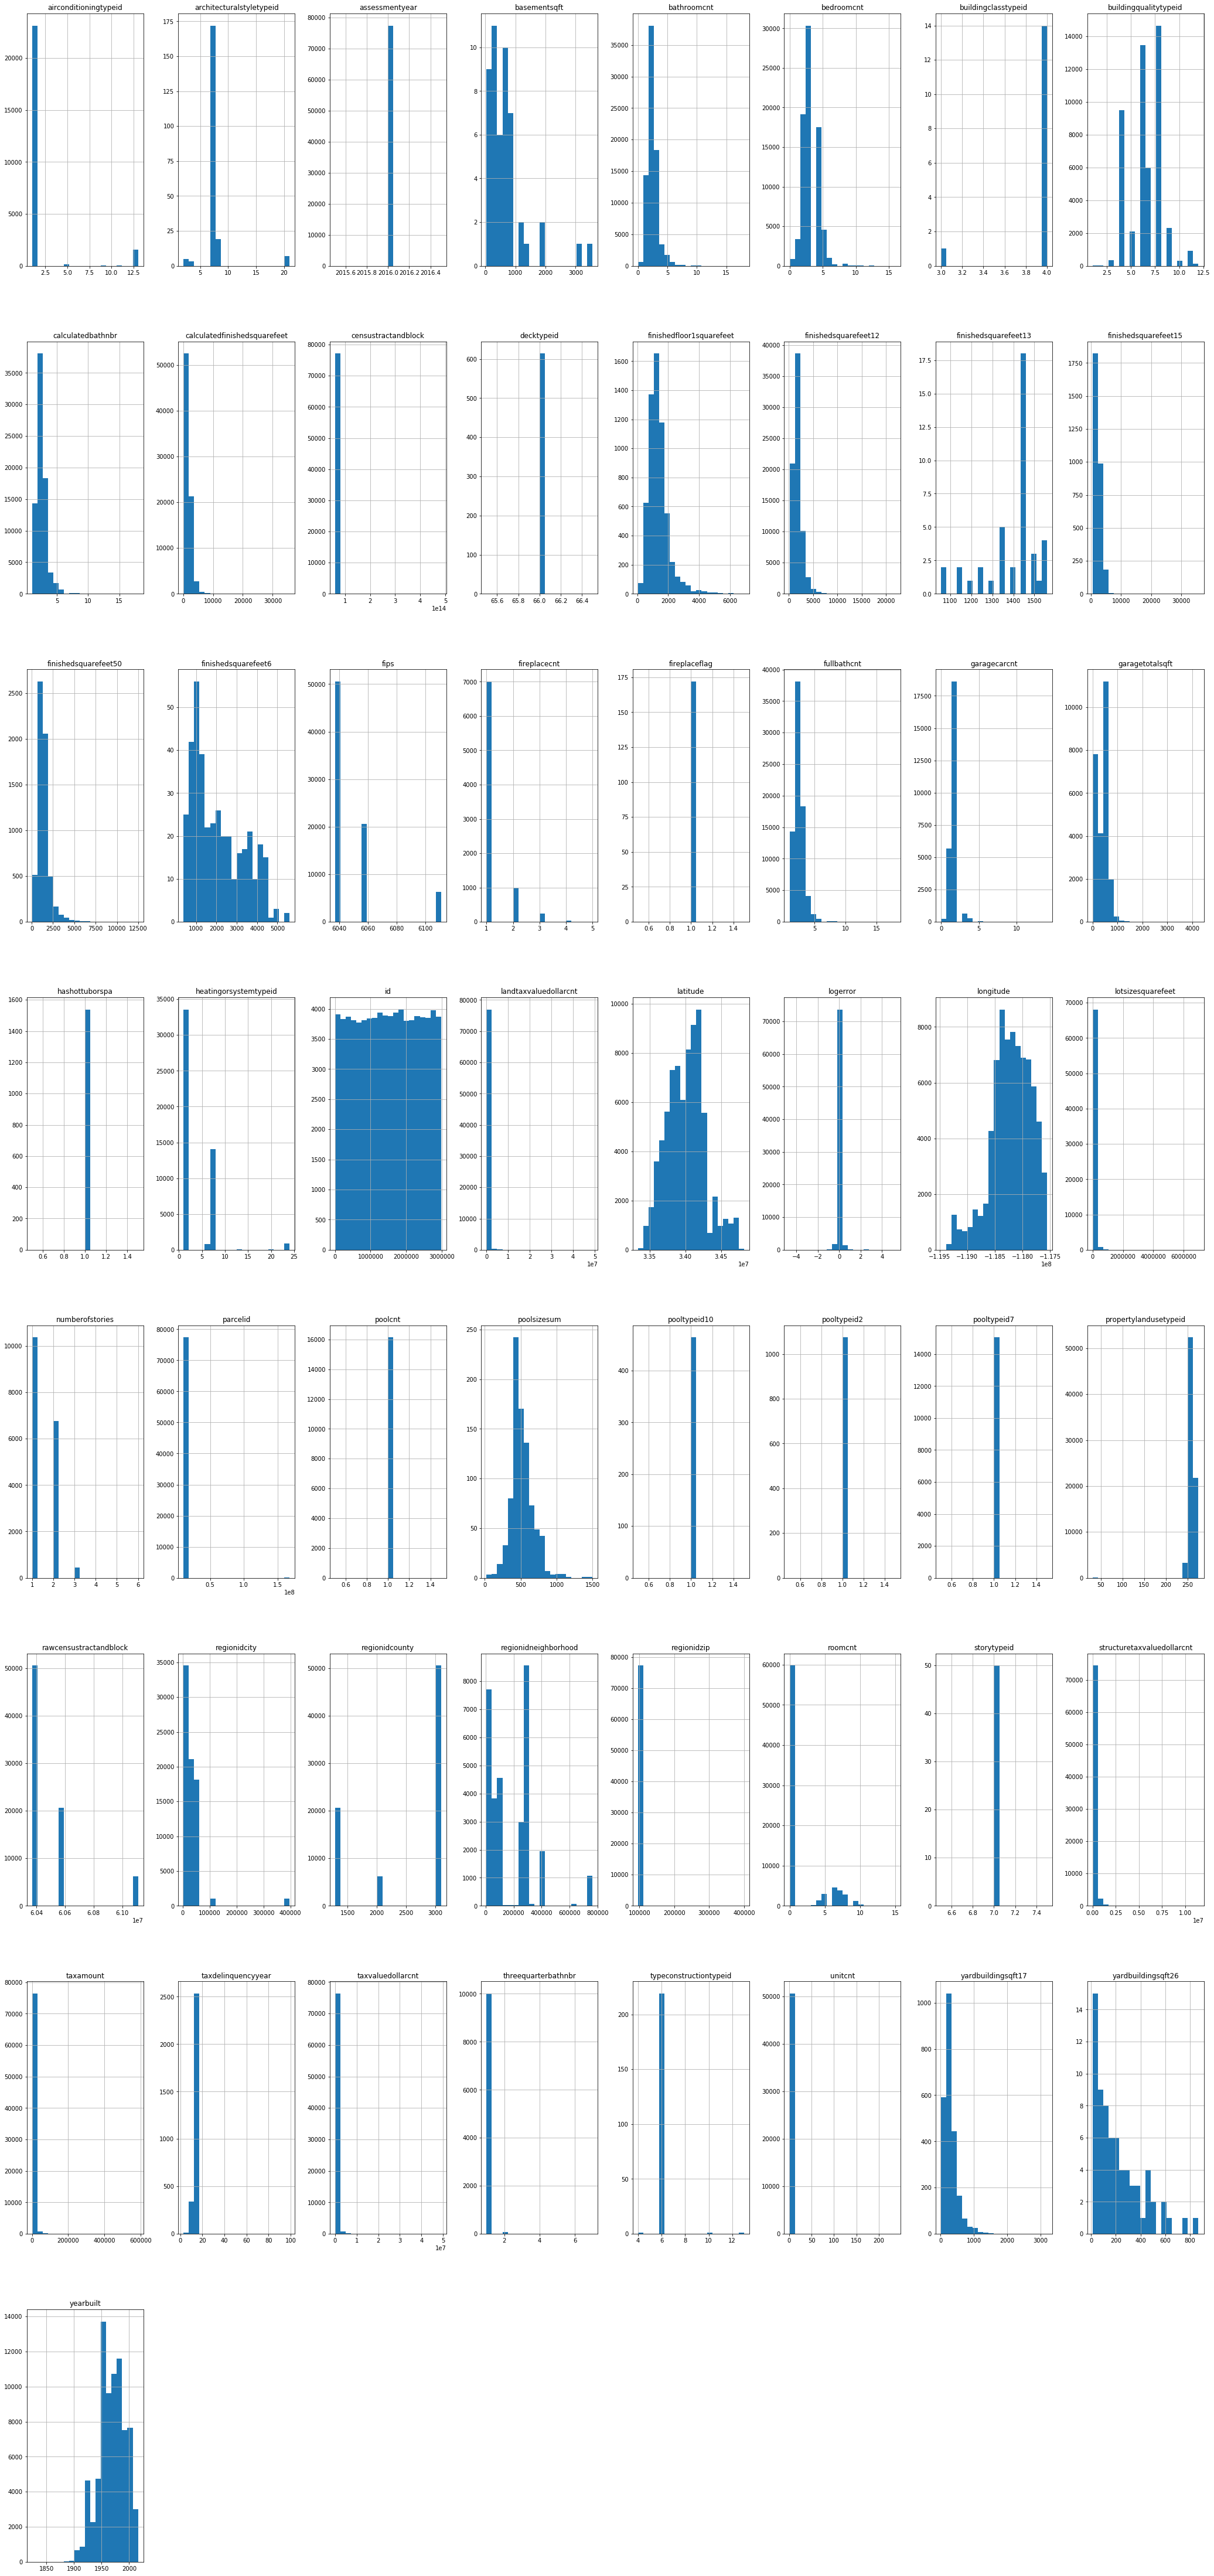

In [218]:
df.hist(figsize=(36, 80), bins=20)
plt.show()



